<a href="https://colab.research.google.com/github/Jud-et/housing/blob/main/Supervised_Learning_I_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data exploration and Preprocessing**

# **Import libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

# **Data Inspection**

In [ ]:
# Loading dataset
df = pd.read_csv('/content/shopping_trends.csv')

In [ ]:
# Display the structure of the dataset
print("Dataset structure:")
print(df.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   ob

# **Data Cleaning**

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [ ]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


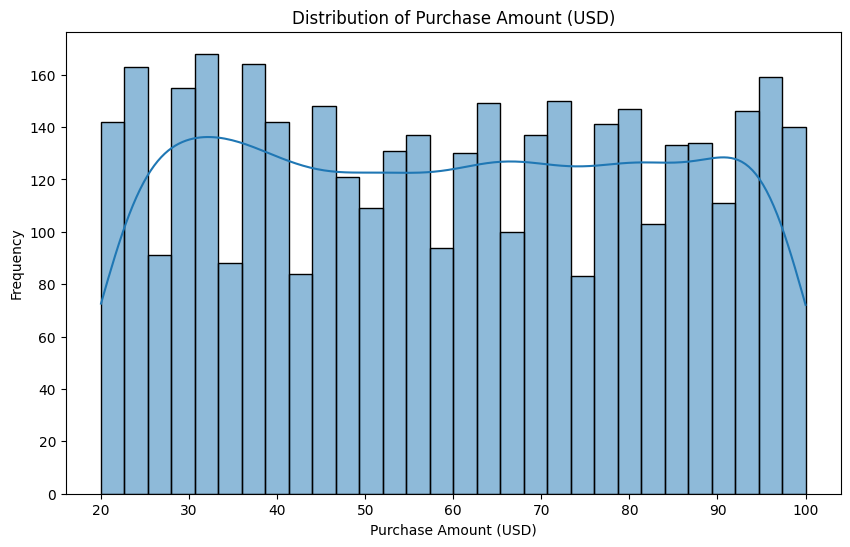

In [ ]:
# EDA: Analyze the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

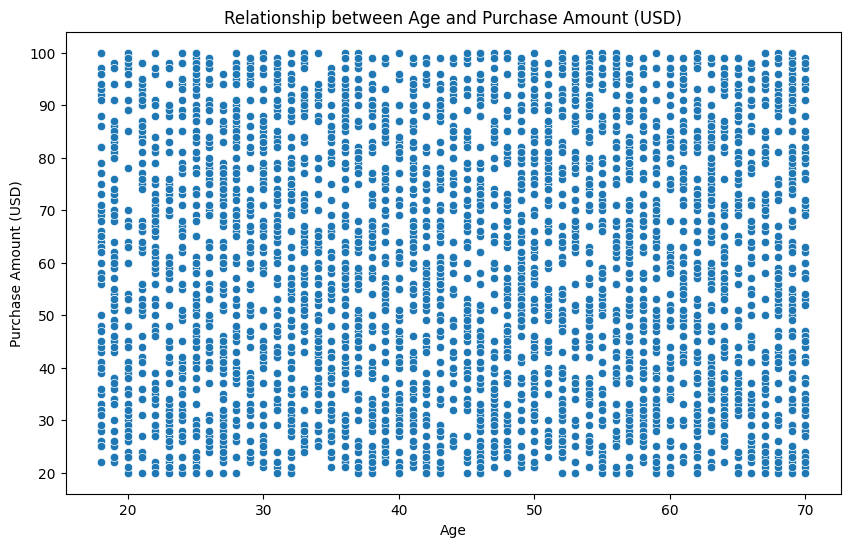

In [ ]:
# EDA: Explore relationships between "Purchase Amount (USD)" and other features
# Creating a scatter plot with 'Age' and 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Relationship between Age and Purchase Amount (USD)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [ ]:
# Handle outliers
# Cap outliers at a certain percentile
outlier_cap = df['Purchase Amount (USD)'].quantile(0.95)
df['Purchase Amount (USD)'] = np.where(df['Purchase Amount (USD)'] > outlier_cap, outlier_cap, df['Purchase Amount (USD)'])
print(df)

      Customer ID  Age  Gender Item Purchased  Purchase Amount (USD)  \
0               1   55    Male         Blouse                   53.0   
1               2   19    Male        Sweater                   64.0   
2               3   50    Male          Jeans                   73.0   
3               4   21    Male        Sandals                   90.0   
4               5   45    Male         Blouse                   49.0   
...           ...  ...     ...            ...                    ...   
3895         3896   40  Female         Hoodie                   28.0   
3896         3897   52  Female       Backpack                   49.0   
3897         3898   46  Female           Belt                   33.0   
3898         3899   44  Female          Shoes                   77.0   
3899         3900   52  Female        Handbag                   81.0   

           Location Size      Color  Season  Review Rating  ...  \
0          Kentucky    L       Gray  Winter            3.1  ...   
1

In [ ]:
print(df.columns)


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Part 2: Feature Selection and Engineering**

In [ ]:
# Feature Correlation indentificatio
correlation_matrix = df.corr().abs()

<ipython-input-16-696e2f2d3133>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()


In [ ]:
# Create a mask to select upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)


In [ ]:
# Find the pairs of highly correlated features
highly_correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                           if upper_triangle_mask[correlation_matrix.columns.get_loc(col1), correlation_matrix.columns.get_loc(col2)] and correlation_matrix.loc[col1, col2] > 0.7]

In [ ]:
# Display highly correlated feature pairs
print("Highly Correlated Feature Pairs:")
print(highly_correlated_pairs)


Highly Correlated Feature Pairs:
[]


In [ ]:
# Convert 'Preferred Payment Method' to numeric
df['Preferred Payment Method'] = pd.to_numeric(df['Preferred Payment Method'], errors='coerce')


In [ ]:
# Feature Engineering
# creating a new feature 'Total Previous Purchases' by summing 'Previous Purchases' and 'Preferred Payment Method' as a binary indicator
df['Total Previous Purchases'] = df['Previous Purchases'] + df['Preferred Payment Method']


In [ ]:
# Extract relevant information from categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Color'], prefix='Color', drop_first=True)


In [ ]:
# Display the first few rows of the DataFrame after feature engineering
print("\nDataFrame after Feature Engineering:")
print(df.head())


DataFrame after Feature Engineering:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size  Season  Review Rating  ... Color_Peach Color_Pink  \
0       Kentucky    L  Winter            3.1  ...           0          0   
1          Maine    L  Winter            3.1  ...           0          0   
2  Massachusetts    S  Spring            3.1  ...           0          0   
3   Rhode Island    M  Spring            3.5  ...           0          0   
4         Oregon    M  Spring            2.7  ...           0          0   

  Color_Purple Color_Red Color_Silve

# **Part 3: Model Selection, Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, r2_score

In [ ]:
# Separating features (X) and target variable (y)
X = df.drop('Purchase Amount (USD)', axis=1)
y = df['Purchase Amount (USD)']

In [ ]:
# Identify numerical and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [ ]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Creating the transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])


In [ ]:
# Creating  preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [ ]:
# Choosing Regression Model - Linear Regression
linear_reg_model = LinearRegression()

In [ ]:
# Creating a pipeline with preprocessing and the linear regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', linear_reg_model)
])


# **Training the Model**

In [ ]:
# Train the model
model_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer ID', 'Age', 'Review Rating', 'Previous Purchases',
       'Preferred Payment Method', 'Total Previous Purchases'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Season',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Frequency of Purchases'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
# Evaluate the model
def evaluate_model(model, X_test, y_test)

In [ ]:
# Making predictions on the test set
y_pred = model_pipeline.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 20.896840599235716
Mean Squared Error: 572.8981831716418


In [ ]:
# Hyperparameter Tuning using Grid Search
param_grid = {
    'model__fit_intercept': [True, False],
}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(model_pipeline, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Customer ID', 'Age', 'Review Rating', 'Previous Purchases',
       'Preferred Payment Method', 'Total Previous Purchases'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(...
                                                                                                        sparse=False))]),
                                                                         Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Season',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Frequency of Purchases'],
      dtype='object'))])),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
# Finding the best model from the grid search
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Model - Mean Absolute Error: {mae}")


Best Model - Mean Absolute Error: 20.896840599235716


In [ ]:
# Display the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'model__fit_intercept': True}


# **Model Evaluation**

In [ ]:
# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 20.896840599235716
Mean Squared Error: 572.8981831716418
R-squared: -0.02379598080271772


# **Part 3: Deployment and Monitoring**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Feature Importance
if hasattr(best_model.named_steps['model'], 'coef_'):
    coefficients = best_model.named_steps['model'].coef_

    # Get feature names from one-hot encoder
    feature_names_categorical = best_model.named_steps['preprocessor'] \
        .named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

    feature_names = numeric_cols.tolist() + feature_names_categorical.tolist()

    # Ensure feature names and coefficients have the same length
    if len(coefficients) == len(feature_names):
        feature_importance = pd.Series(coefficients, index=feature_names)
        feature_importance = feature_importance.sort_values(ascending=False)

        # Plotting Feature Importance
        plt.figure(figsize=(10, 6))
        feature_importance.plot(kind='bar')
        plt.title('Feature Importance')
        plt.xlabel('Feature')
        plt.ylabel('Coefficient')
        plt.show()
    else:
        print("Mismatch in the lengths of coefficients and feature names.")
else:
    print("Feature importance not available for this model.")

Mismatch in the lengths of coefficients and feature names.


# **Comparing results vs Actual values**

In [ ]:
# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

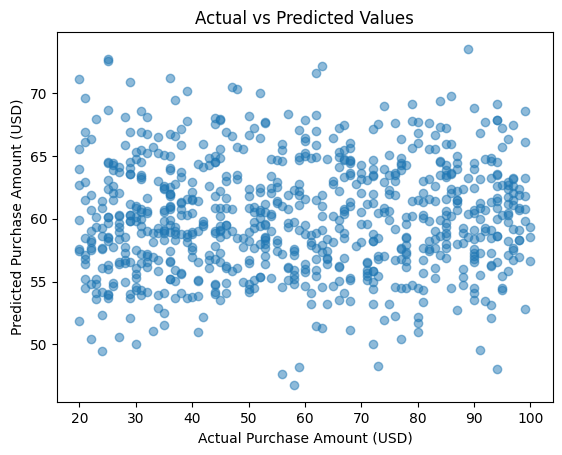

In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.show()

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

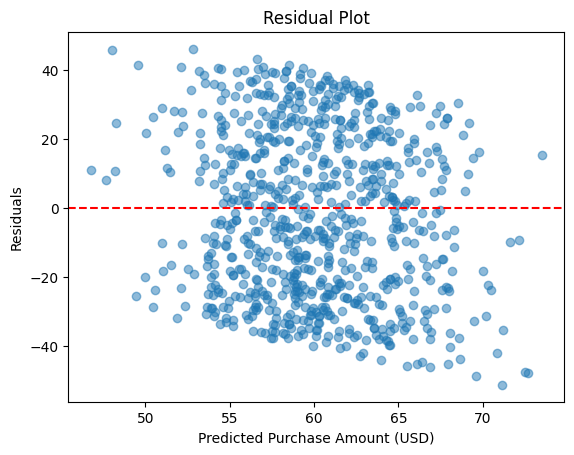

In [ ]:
# Scatter plot of residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase Amount (USD)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0 for reference
plt.show()

# **Docummentation**
# Data Exploration and Preprocessing
## Data Inspection
### Examine the structure of the dataset.
###Check for missing values and outliers in the "Purchase Amount (USD)" column.

## Exploratory Data Analysis (EDA)
### Analyze the distribution of the target variable.
### Explore relationships between "Purchase Amount (USD)" and other features.

## Data Cleaning
### Handle missing values and outliers appropriately.
### Encode categorical variables if necessary.
### Standardize or normalize numerical features.

# Feature Selection and Engineering
## Feature Correlation
### Identifying highly correlated features.
### Removing or combining features to reduce multicollinearity.

## Feature Engineering
### Creating new features that might enhance the predictive power.
### Extracting relevant information from categorical variables.

# Model Selection
## Choosing Regression Models
### Selected the linear regression algorithms for predicting continuous values.

## Model Evaluation
### Splitted the dataset into training and testing sets.
### Evaluating the model using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error).

# Model Training and Tuning
## Train the Model
### Train the linear regression model on the training dataset.

## Hyperparameter Tuning
### Fine-tune model hyperparameters using techniques the grid search method
# Model Evaluation (Continued)
## Evaluate on Test Set
### Assess the model's performance on the test set.
### Compare predicted values with actual "Purchase Amount (USD)".

## Performance Metrics
### Use appropriate regression metrics (e.g., R-squared, Mean Absolute Error) to quantify model performance.

# Interpretability and Validation
## Feature Importance
### Examine feature importance to understand which features contribute most to predictions.

## Cross-Validation
### Perform cross-validation to ensure model robustness.

# Visualization
## Visualize Predicted vs Actual Values
### Scatter plot comparing actual vs predicted values.

## Residual Plot
### Scatter plot of residuals to visualize errors.

# Documentation and Communication
## Documentation
### Document the entire process, including data preprocessing steps, feature selection, and model details.

## Communication
### Communicate findings, limitations, and recommendations to stakeholders.


In [ ]:
!jupyter nbconvert --to html Supervised_Learning_Individual_Project_.ipynb

[NbConvertApp] Converting notebook Supervised_Learning_Individual_Project_.ipynb to html
[NbConvertApp] Writing 1088776 bytes to Supervised_Learning_Individual_Project_.html
